<a href="https://colab.research.google.com/github/raj-027/MDSC-302-P-/blob/main/24040208005_MDSC_302(p)_AIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1 - IMAGE

In [1]:
!pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
import os
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
image_folder = "/content/drive/MyDrive/image data"
transform = transforms.ToTensor()

Image: SSSIHL PIC.jpg
Brightness: 0.7684909701347351
  R mean: 0.8294, G mean: 0.7450, B mean: 0.7311


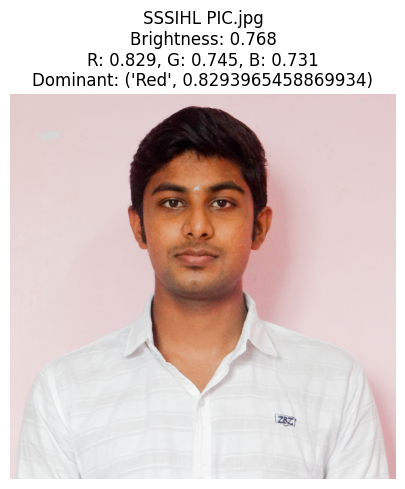

Image: ASE_5K (156).JPG
Brightness: 0.6597053408622742
  R mean: 0.6619, G mean: 0.6848, B mean: 0.6325


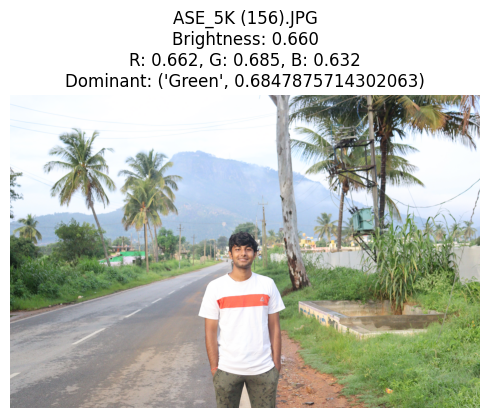

Image: ID_AP (26).JPG
Brightness: 0.4449893534183502
  R mean: 0.5163, G mean: 0.4650, B mean: 0.3537


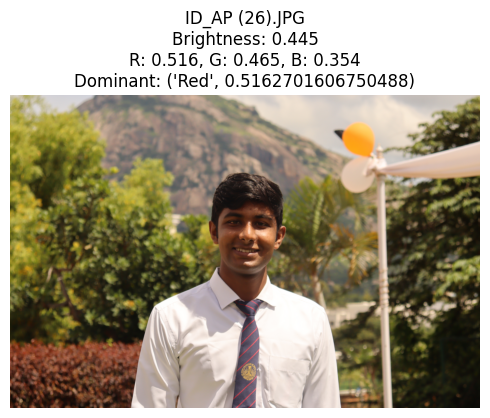

Image: IMG-20250701-WA0012.jpg
Brightness: 0.5769441723823547
  R mean: 0.5810, G mean: 0.5728, B mean: 0.5770


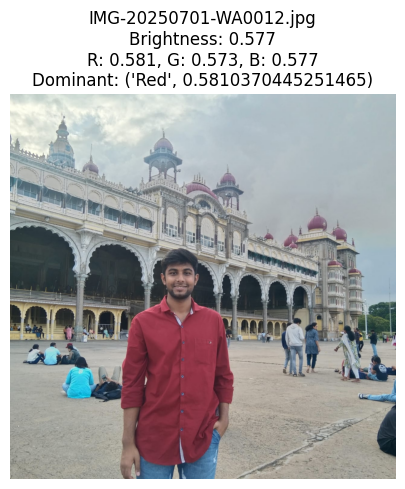

In [10]:
for filename in os.listdir(image_folder):
  if filename.lower().endswith(('png', 'jpeg', 'jpg')):
    image_path = os.path.join(image_folder, filename)
    image = Image.open(image_path).convert("RGB")

    tensor = transform(image)

    brightness = tensor.mean().item()

    red_mean = tensor[0].mean().item()
    green_mean = tensor[1].mean().item()
    blue_mean = tensor[2].mean().item()

    print(f"Image: {filename}")
    print(f"Brightness: {brightness}")
    print(f"  R mean: {red_mean:.4f}, G mean: {green_mean:.4f}, B mean: {blue_mean:.4f}")

    max_color = max(("Red", red_mean), ("Green", green_mean), ("Blue", blue_mean), key=lambda x: x[1])


    # Display image and stats
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{filename}\nBrightness: {brightness:.3f}\nR: {red_mean:.3f}, G: {green_mean:.3f}, B: {blue_mean:.3f}\nDominant: {max_color}")
    plt.tight_layout()
    plt.show()

# Exercise 2 - TEXT

Building index of all words in python file

In [14]:
import re
from collections import Counter

# Load the Python file
with open("/content/drive/MyDrive/image data/vllm_infer.py", "r", encoding="utf-8") as f:
    code = f.read()

# Tokenization: keep only alphanumeric and underscores as word characters
tokens = re.sub(r"[^a-zA-Z0-9_]+", " ", code).lower().split()

# Build index (word frequency)
code_index = Counter(tokens)

print("Total unique tokens in code:", len(code_index))
print("Top 10 tokens:", code_index.most_common(10))


Total unique tokens in code: 295
Top 10 tokens: [('0', 14), ('import', 14), ('batch', 13), ('the', 12), ('from', 11), ('none', 11), ('int', 10), ('model_args', 10), ('j', 10), ('license', 8)]


compare with pride and prejudice

In [15]:
import nltk
from nltk.corpus import gutenberg

# Download the book if needed
nltk.download('gutenberg')

# Load Pride and Prejudice
pp_text = gutenberg.raw('austen-persuasion.txt')  # Can also use 'austen-emma.txt' or 'austen-sense.txt'

# Tokenize similarly
pp_tokens = re.sub(r"[^a-zA-Z0-9_]+", " ", pp_text).lower().split()
pp_index = Counter(pp_tokens)

print("Total unique tokens in Pride and Prejudice:", len(pp_index))
print("Top 10 tokens:", pp_index.most_common(10))


[nltk_data] Downloading package gutenberg to /root/nltk_data...


Total unique tokens in Pride and Prejudice: 5777
Top 10 tokens: [('the', 3329), ('to', 2808), ('and', 2801), ('of', 2570), ('a', 1595), ('in', 1389), ('was', 1337), ('her', 1204), ('had', 1186), ('she', 1146)]


[nltk_data]   Unzipping corpora/gutenberg.zip.


One-Hot encode the source code

In [16]:
import numpy as np

# Vocabulary and token list
vocab = list(code_index.keys())
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Take first N tokens
N = 100
selected_tokens = tokens[:N]

# Create one-hot encoded matrix
one_hot_matrix = np.zeros((N, len(vocab)), dtype=int)

for i, word in enumerate(selected_tokens):
    index = word_to_index[word]
    one_hot_matrix[i][index] = 1

print("One-hot encoding shape:", one_hot_matrix.shape)
print("Example row for token:", selected_tokens[0])
print(one_hot_matrix[0])


One-hot encoding shape: (100, 295)
Example row for token: copyright
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


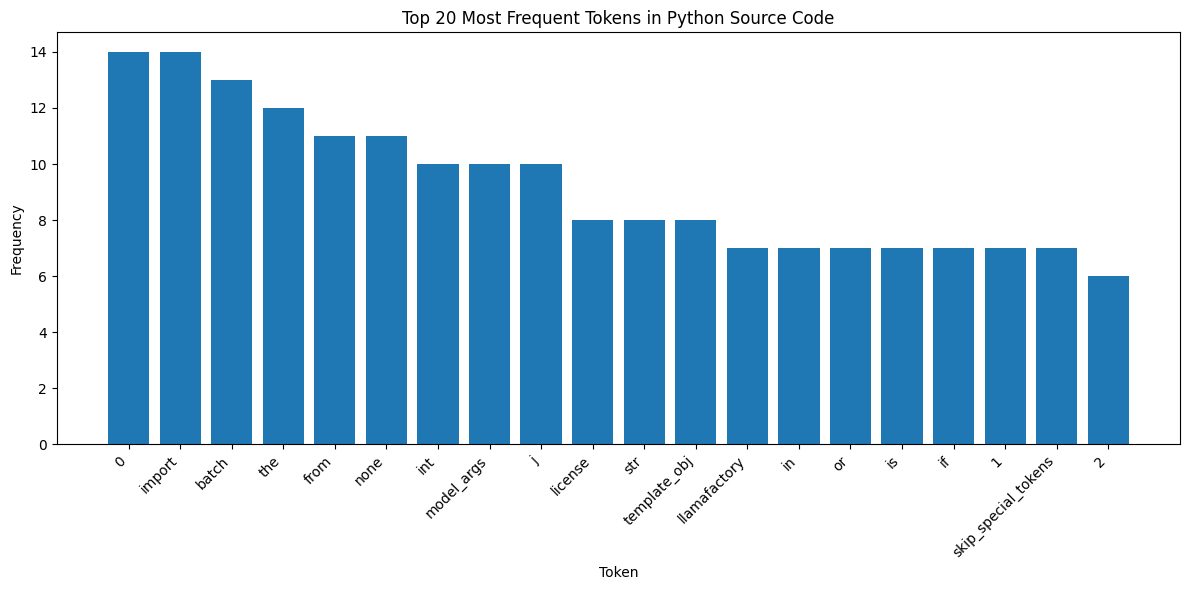

In [17]:
import matplotlib.pyplot as plt

# Choose top N most frequent tokens
top_n = 20
most_common_tokens = code_index.most_common(top_n)

# Split tokens and counts
words, counts = zip(*most_common_tokens)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Tokens in Python Source Code")
plt.tight_layout()
plt.show()
